In [1]:
#Forcasting Example

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
airlines = pd.read_csv('/home/mkadam/Data Science - Marsian Class/04 ML/11 TimeSeries/Data/airline_passengers.csv',index_col=0, parse_dates=True)

In [3]:
airlines.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [4]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
Thousands of Passengers    144 non-null int64
dtypes: int64(1)
memory usage: 2.2 KB


In [17]:
# Step 1 - split
train_data = airlines.iloc[:109]
test_data = airlines.iloc[108:]

In [6]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

In [7]:
#Instantiation of model
model = ExponentialSmoothing(train_data['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12)

/home/mkadam/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/mkadam/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)


In [8]:
# Step 2 : fit the model
fitted_model = model.fit()

In [10]:
# Step 3 : Predicting/ forcasting
test_predictions = fitted_model.forecast(steps=36)

/home/mkadam/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
/home/mkadam/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
/home/mkadam/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


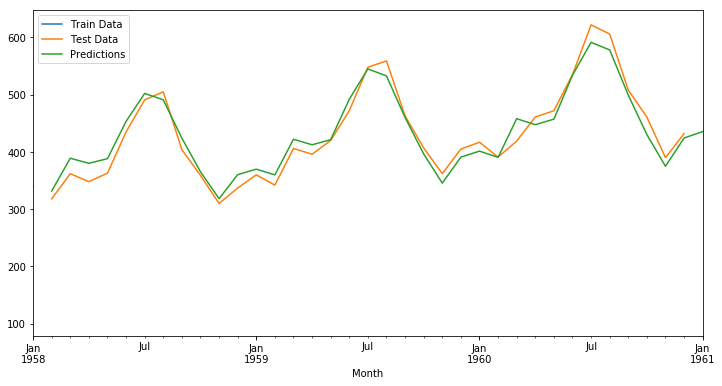

In [14]:
train_data['Thousands of Passengers'].plot(legend=True, label='Train Data')
test_data['Thousands of Passengers'].plot(legend=True, label='Test Data', figsize=(12,6))
test_predictions.plot(legend=True, label='Predictions', xlim=['1958-01-01','1961-01-01'])

# we don't have any train data for this above data range, so below graph only shows the test data and preds

In [15]:
# Step 4 : Evaluate the model
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [18]:
print(mean_absolute_error(test_data, test_predictions))

46.30290455233973


In [19]:
print(mean_squared_error(test_data,test_predictions))

3075.3284665739775


In [20]:
print(np.sqrt(mean_squared_error(test_data,test_predictions)))

55.45564413631833


In [25]:
# this is the root mean squared error for this model...you can try other models to reduce this error

In [26]:
# Step 5 : For training on whole data, creating another model 
final_model = ExponentialSmoothing(airlines['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

/home/mkadam/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/mkadam/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)


In [27]:
# Step 6 : forcasting

forcast = final_model.forecast(36)
#forcasting for next 36 months

/home/mkadam/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
/home/mkadam/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
/home/mkadam/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


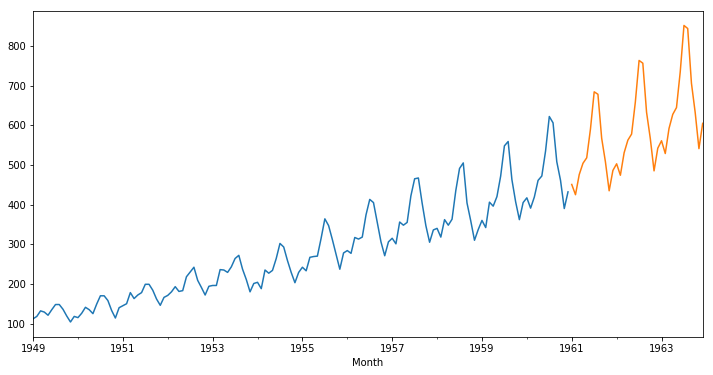

In [28]:
#Plot the actual and forcasted data
airlines['Thousands of Passengers'].plot(figsize=(12,6))
forcast.plot()

In [29]:
df1 = pd.read_csv('/home/mkadam/Data Science - Marsian Class/04 ML/11 TimeSeries/Data/airline_passengers.csv',index_col='Month', parse_dates=True)
df1.index.freq = 'MS'

In [30]:
df2 = pd.read_csv('/home/mkadam/Data Science - Marsian Class/04 ML/11 TimeSeries/Data/DailyTotalFemaleBirths.csv',index_col='Date', parse_dates=True)
df2.index.freq ='D'

In [31]:
from statsmodels.tsa.stattools import acovf, acf, pacf_yw, pacf_ols
#Yule Walker - yw
#Orrdinary Least Square

In [32]:
import warnings
warnings.filterwarnings('ignore')

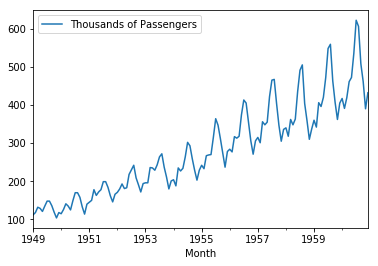

In [33]:
df1.plot()

#such datasets having trends called Non-Stationary

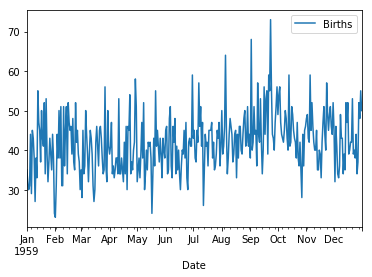

In [34]:
df2.plot()

#such datasets having no trends called Stationary

In [35]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

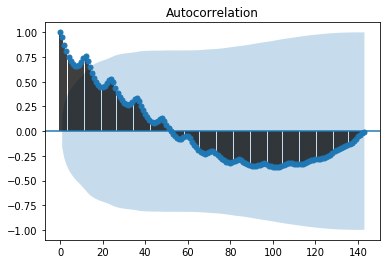

In [37]:
plot_acf(df1);

# bydefault the lags will consider all period

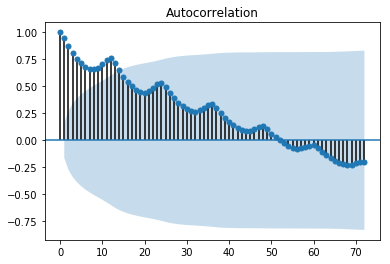

In [39]:
# Plotting ACF  -Auto Correlation Function

plot_acf(df1, lags=72); #Non-stationary dataset

# shaded part indicates is 95% confidence interval for 40 lags
# the points outside 95% are highly correlated

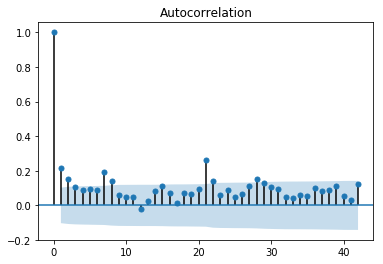

In [40]:
# Plotting ACF  -Auto Correlation Function

plot_acf(df2, lags=42); #Stationary dataset

# For stationary, there could be sudden drop in correlation, e.g., 12-13 
# shaded part indicates is 95% confidence interval for 40 lags
# the points outside 95% are highly correlated
# For the first lag, it will calculate the correlation with itself, value is 1 for first lag in graph

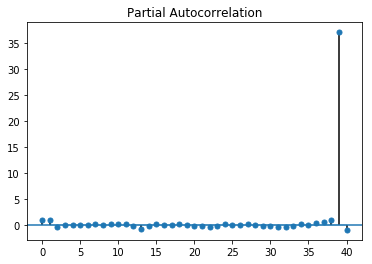

In [41]:
# Plotting PACF  - Partial Auto Correlation Function
plot_pacf(df1, lags=40);

# for Non-stationary dataset
# 

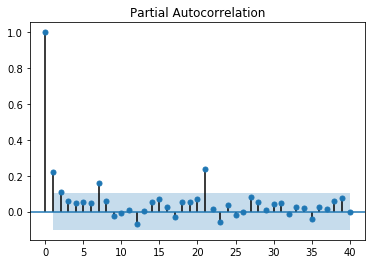

In [42]:
# Plotting PACF  - Partial Auto Correlation Function
plot_pacf(df2, lags=40);

# for stationary dataset
# 

In [44]:
# Auto-correlation models

df = pd.read_csv('/home/mkadam/Data Science - Marsian Class/04 ML/11 TimeSeries/Data/uspopulation.csv',index_col='DATE', parse_dates=True)
df.index.freq ='MS'


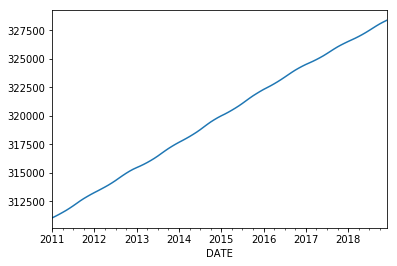

In [45]:
df['PopEst'].plot()

In [46]:
train = df.iloc[:84]
test  = df.iloc[84:]

In [48]:
from statsmodels.tsa.ar_model import AR, ARResults

In [49]:
model = AR(train['PopEst'])

In [57]:
#AR_fit = model.fit(maxlag=1,method='mle')

#maxlag - if you don't give, model will find out best degreee and will use it
AR_fit = model.fit(method='mle')

In [58]:
AR_fit.k_ar
#get the optimal order using this parameter

11

In [59]:
AR_fit.params

const         96.172543
L1.PopEst      2.296223
L2.PopEst     -2.240371
L3.PopEst      2.102762
L4.PopEst     -2.084028
L5.PopEst      1.437058
L6.PopEst     -1.337128
L7.PopEst      1.453976
L8.PopEst     -0.786999
L9.PopEst      0.470484
L10.PopEst    -0.368892
L11.PopEst     0.056613
dtype: float64

In [62]:
# For lag = 1 (maxlag)
# y = 141.22 + 0.99*indep var(feature)
# so its like linear reg model

# 11 lags model has decided for best results so 
# y = 96.17 + x1 * 2.29 + x1 * -2.296 + ......
# it has considered 11 time lags to calculate the best output (past time lasg from start)

In [63]:
start = len(train)
end   = len(train) + len(test) - 1

#predictions = AR_fit.predict(start=84, end=95)

predictions = AR_fit.predict(start=start, end=end)

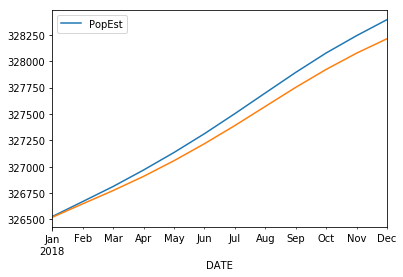

In [64]:
test.plot()
predictions.plot()

In [65]:
model2 = AR(df['PopEst'])
AR2_fit= model2.fit(method='mle')

In [67]:
forcast1 = AR2_fit.predict(start=len(df), end=len(df)+12)

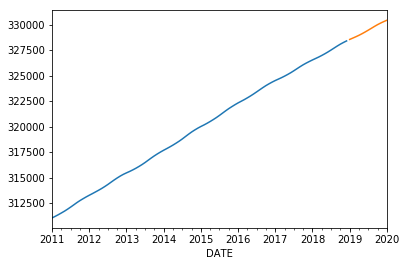

In [68]:
df['PopEst'].plot()
forcast1.plot()